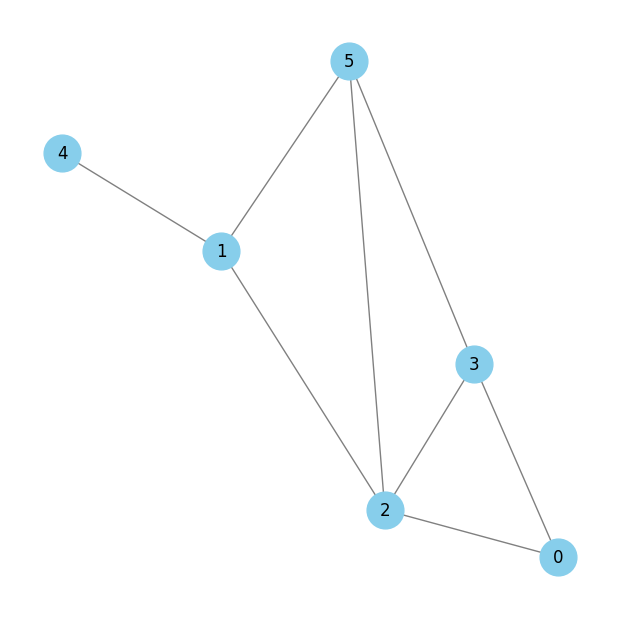

True
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}


In [1]:
### CREATE A RANDOM GRAPH G ###

import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 6 # Number of nodes
p = 0.5  # Probability of edge creation

# Generate a random connected Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)
# while not nx.is_connected(G):
#     G = nx.erdos_renyi_graph(n, p)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()
print(nx.is_connected(G))

# Assign labels to nodes based on their connected component
component_labels = {node: i for i, component in enumerate(nx.connected_components(G)) for node in component}

# Print node labels
print(component_labels)

In [2]:
import random
random_node = random.choice(list(G.nodes))
print(random_node)
spanning_tree = nx.dfs_tree(G, source=random_node)
print(list(spanning_tree.edges()))

4
[(4, 1), (1, 2), (2, 0), (0, 3), (3, 5)]


In [3]:
import networkx as nx
import random

# Select a random starting node
random_node = random.choice(list(G.nodes))

# Get a spanning tree using DFS
spanning_tree = nx.dfs_tree(G, source=random_node)
spanning_tree_edges = set(spanning_tree.edges())

# Convert spanning tree to an undirected graph
spanning_tree_undirected = nx.Graph(spanning_tree)

# Find edges not in the spanning tree (back edges)
back_edges = set(G.edges()) - spanning_tree_edges

# Find the fundamental set of cycles
fundamental_cycles = []
for u, v in back_edges:
    # Find the path in the spanning tree between u and v
    path = nx.shortest_path(spanning_tree_undirected, source=u, target=v)
    cycle = path + [u]  # Complete the cycle
    fundamental_cycles.append(cycle)

# Print fundamental cycles
for i, cycle in enumerate(fundamental_cycles):
    print(f"Cycle {i+1}: {cycle}")


Cycle 1: [1, 2, 0, 3, 5, 1]
Cycle 2: [1, 4, 1]
Cycle 3: [2, 0, 3, 2]
Cycle 4: [0, 2, 0]
Cycle 5: [2, 0, 3, 5, 2]


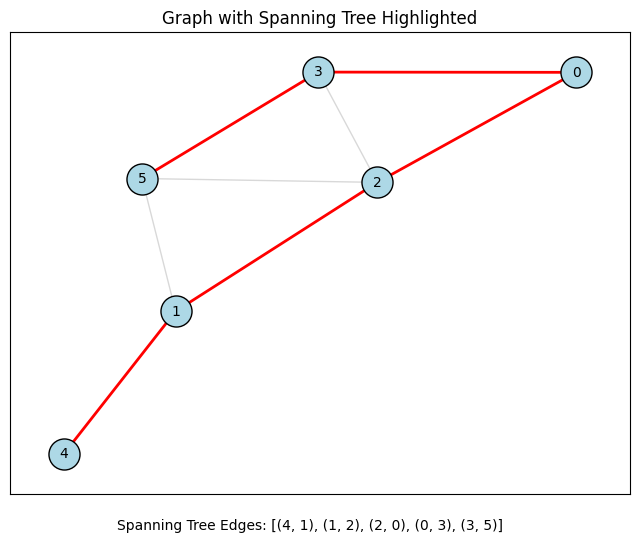

In [4]:
def plot_spanning_tree(G, spanning_tree):
    """Plot the original graph and highlight the undirected spanning tree edges."""
    
    pos = nx.spring_layout(G)  # Compute layout for nodes

    plt.figure(figsize=(8, 6))

    # Draw the original graph edges first (background edges)
    nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.3, width=1)

    # Draw spanning tree edges in red
    nx.draw_networkx_edges(spanning_tree, pos, edge_color="red", width=2)

    # Draw nodes on top of edges
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", edgecolors="black", node_size=500)

    # Draw labels on top
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    plt.title("Graph with Spanning Tree Highlighted")

    # Add subtitle below the graph listing the spanning tree edges
    spanning_tree_edges = list(spanning_tree.edges())
    subtitle = f"Spanning Tree Edges: {spanning_tree_edges}"
    plt.figtext(0.5, 0.05, subtitle, wrap=True, horizontalalignment='center', fontsize=10)
    
    plt.show()



# Plot the graph with the spanning tree highlighted
plot_spanning_tree(G, spanning_tree_undirected)